<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Transformada_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables aleatorias no uniformes
## Método de la transformada inversa
### Pasos:


1.   Dado $f(x)$, calculamos $$F(x) = \int_{-\infty}^xf(\xi)d\xi$$
2.   Suponer $R \sim (0, 1)$ y resolver $F(x) = R$, para obtener $$x = F^{-1}(R)$$



Ejempo con distribución triangular con parámetros: $$a = 1, b = 3, c = 5$$

Función de distribución
$$f(x) = \left\{\begin{matrix}
\frac{2(x - a)}{(c - a)(b - a)} & \text{si} & a \le x \le b\\
\frac{2(x - c)}{(c - a)(b - c)} & \text{si} & b < x \le c
\end{matrix}\right.$$
Media y varianza teóricas:
$$\mu = \frac{a + b + c}{3}$$\
$$\sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}$$

In [1]:
from random import random
import matplotlib.pyplot as plt
import numpy as np

Función de distribución triangular

In [13]:
def f(a, b, c, x):
  if x >= a and x <= b:
    return 2*(x - a)/((b - a)*(c - a))
  elif x > b and x <= c:
    return 2*(x - c)/((b - c)*(c - a))
  else:
    return 0

Gráfica de la distribución triangular

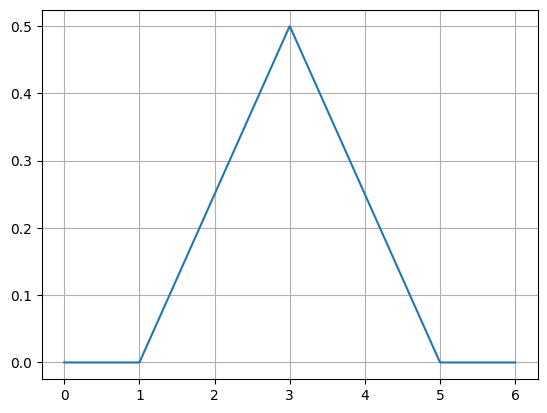

In [17]:
x = np.linspace(0, 6, 1000)
y = [f(1, 3, 5, x) for x in x]
plt.plot(x, y)
plt.grid(True)
plt.show()

Función de transformada inversa, en dónde
$$F(x) = \left\{\begin{matrix}
\frac{(x - a)^2}{(c - a)(b - a)} & \text{si} & a \le x \le b\\
1 + \frac{(x - c)^2}{(c - a)(b - c)} & \text{si} & b < x \le c
\end{matrix}\right.$$\
$$x = F^{-1}(R) = \left\{\begin{matrix}
a + \sqrt{R(c - a)(b - a)} & \text{si} & R \le \frac{b - a}{c - a}\\
c - \sqrt{(R - 1)(c - a)(b - c)} && \text{otro caso}
\end{matrix}\right.$$

In [25]:
def trans_inv(a, b, c, n):
  x = []
  for i in range(n):
    R = random()
    if R <= (b - a)/(c - a):
      x.append(a + np.sqrt((b - a)*(c - a)*R))
    else:
      x.append(c - np.sqrt((c - a)*(c - b)*(1 - R)))
  return x

Histograma de 100,000 números generados

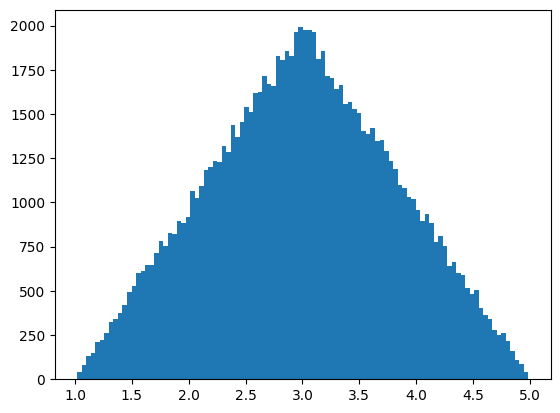

In [26]:
a, b, c = 1, 3, 5
tri = trans_inv(a, b, c, 100000)
plt.hist(tri, bins = 100)
plt.show()

Comparación entre media y varianzas simuladas y teóricas

In [29]:
mu_sim = np.mean(tri)
s_sim = np.var(tri)

mu_teo = (a + b + c)/3
s_teo = (a**2 + b**2 + c**2 - a*b - a*c - b*c)/18

print("Media teórica:", mu_teo)
print("Media simulada:", mu_sim)

print("\nVarianza teórica:", s_teo)
print("Varianza simulada:", s_sim)

Media teórica: 3.0
Media simulada: 2.9998704728119843

Varianza teórica: 0.6666666666666666
Varianza simulada: 0.6651947766927109
